# Graph Mining HW 01 (220920)
- [과제 수행 내용] 실제 데이터를 활용해 그래프를 생성하고, 이를 Gephi를 이용해 시각화할 것.
- [데이터] vivino 와인 리뷰 데이터 
- [제출파일]
  - 다음 두 파일을 zip 파일로 묶어 제출하시오. (파일명: hw01_학번+이름.zip)
    1. 해당 파일 내 코드 및 답변을 추가한 ipynb 파일 (파일명: hw01_answer_학번+이름.ipynb)
    2. 과제 수행 마지막에 저장한 그래프 이미지 파일 (파일명: hw01_graph_학번+이름.png)
- [제출기한] 9월 26일 (월) 자정 (23:59까지)
- [유의사항] 
  1. 제출 파일 형식에 맞춰 결과물을 정확히 제출할 것.
  2. 제출 기한을 엄수할 것.

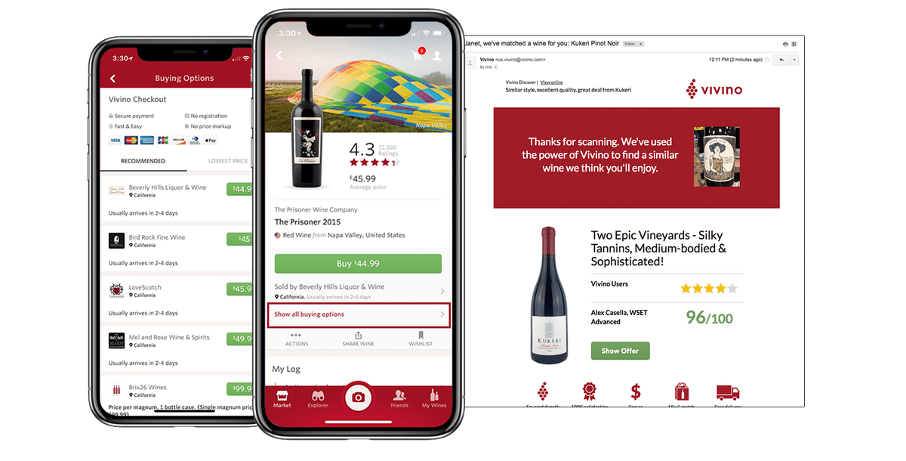

# 1. Environment Setting

In [ ]:
import pandas as pd
import networkx as nx

# 2. Load Dataset

In [ ]:
# load dataset
wine = pd.read_csv('./wine_info_gm.csv')
user = pd.read_csv('./user_info_gm.csv')
review = pd.read_csv('./review_gm.csv')

In [ ]:
'''
     [Wine Table : wine information]
     
1. wid : wine_id
2. name : wine_name
3. vintage : wine_vintage
4. winery : winery_name
5. avg_ratings : 해당 와인에 대한 평균 평점
6. num_ratings : 해당 와인에 대한 리뷰 개수
7. foods : 해당 와인과 잘 어울리는 음식

'''
wine

,wid,name,vintage,winery,avg_ratings,num_ratings,price,foods
0,w0,Clos d'Ambonnay Blanc de Noirs Brut Champagne,1995,Krug,4.9,135,"$7,500","Pork, Rich fish (salmon, tuna etc), Shellfish,..."
1,w1,The Beast Cabernet Sauvignon,2017,Del Dotto,4.9,61,$525.76,"Beef, Lamb, Game (deer, venison), Mature and h..."
2,w2,Château Margaux (Premier Grand Cru Classé),2018,Château Margaux,4.9,35,"$1,695","Beef, Lamb, Game (deer, venison), Poultry"
3,w3,Vintage Port Nacional,1994,Quinta do Noval,4.9,34,"$2,200","Beef, Mature and hard cheese"
4,w4,Grand Vin Pauillac (Premier Grand Cru Classé),1990,Château Latour,4.8,1506,"$1,695","Beef, Lamb, Game (deer, venison), Poultry"
...,...,...,...,...,...,...,...,...
3406,w3406,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,2015,Château Pavie,4.8,96,"€424,46","Beef, Lamb, Game (deer, venison), Poultry"
3407,w3407,Vecina,2013,Bond,4.8,95,€750,"Beef, Lamb, Game (deer, venison), Poultry"
3408,w3408,Montrachet Grand Cru Marquis de Laguiche,2017,Joseph Drouhin,4.8,93,€645,"Pasta, Rich fish (salmon, tuna etc), Shellfish..."
3409,w3409,Don PX Pedro Ximenez,1946,Toro Albalá,4.8,89,"€26,78","Sweet desserts, Blue cheese"


In [ ]:
'''
     [User Table : user information]
     
1. uid : user_id
2. name : user_name
3. country : user_country
4. ratings : 해당 유저가 별점을 매긴 리뷰 수 
5. follwer : 해당 유저를 팔로우 하는 사람의 수 
6. following : 해당 유저가 팔로잉 하는 사람의 수 

'''
user

,uid,name,country,ratings,follower,following
0,u0,Oli G.,Italy,9385,3944,760
1,u1,Massimo Trussardi,Italy,9490,5902,421
2,u2,Claus,Italy,7104,3474,5000
3,u3,Titti,Italy,6591,6544,1155
4,u4,Enrico G,Italy,4752,4936,362
...,...,...,...,...,...,...
2975,u2975,Sarah Vital,France,297,14,12
2976,u2976,Hugues M,France,262,60,143
2977,u2977,Λανκελοτ Μυνιχ,France,244,41,45
2978,u2978,Sarto,France,272,77,177


In [ ]:
'''
     [Review Table : wine에 대한 user의 리뷰]
     
1. uid : user_id
2. wid : wine_id
3. name : user_name
4. wine_name : wine_name
5. wine_vintage : wine_vintage
6. rating : 해당 유저가 와인에 대해 매긴 별점

'''
review

,uid,wid,name,wine_name,wine_vintage,rating
0,u0,w1293,Oli G.,Bricco dell'Uccellone Barbera d'Asti,2017,4.0
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
...,...,...,...,...,...,...
15481,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
15482,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
15483,u2726,w2392,Robin Berner,Cabernet Franc,2012,3.0
15484,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


# 3. Preprocessing [3점]
- 결측값 처리와 같은 기본적인 전처리는 이미 해둔 상태임.
- 중복 데이터에 대한 처리 수행할 것.
- [중복 데이터] 동일한 유저가 동일한 와인에 대해 별점을 매긴 데이터.

## 3-1. 중복 데이터를 확인하고 제거하시오. [1점]

###  Q1. 중복된 데이터의 개수 확인 [0.5점]
- 중복된 데이터가 몇 개인지 출력할 것.
- [Hint] pandas의 duplicated 함수를 활용할 것.

In [ ]:
# ---- your code ----- #

2296

### Q2. 중복된 데이터 삭제 [0.5점]
- 이때, 중복된 데이터의 경우 마지막 데이터만 남기고 지울 것.
- 삭제 후 행의 개수가 13,190개인 것을 확인할 것.

In [ ]:
# ---- your code ----- # 

# ------- print ------- # 
review

,uid,wid,name,wine_name,wine_vintage,rating
0,u0,w1293,Oli G.,Bricco dell'Uccellone Barbera d'Asti,2017,4.0
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
...,...,...,...,...,...,...
15481,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
15482,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
15483,u2726,w2392,Robin Berner,Cabernet Franc,2012,3.0
15484,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


In [ ]:
# reset index
review.reset_index(drop=True, inplace=True)

## 3-2. 데이터를 분석 목적에 맞게 필터링하시오. [2점]
- 너무 많은 노드와 엣지가 포함되어 있는 경우 시각화하기 쉽지 않음.
- 이 경우 데이터 내에서 분석하고자 하는 목적, 강조하고 싶은 부분에 따라 적절히 필터링하여 사용.

## [분석 포인트] 어떤 와인이 많은 리뷰를 받았는가?


- 이번 과제에서는 어떤 와인이 리뷰를 많이 받았는지 강조하여 시각화 해볼 것임.
- 리뷰를 적게 받은 와인은 적절히 필터링하여, 노드 수를 축소할 것.

In [ ]:
# Wine count : 리뷰에 언급된 와인 수 확인
wine_cnt = review['wid'].value_counts()
wine_cnt

w1283    722
w2347    592
w1245    287
w3357    235
w1072    218
        ... 
w3252      1
w1347      1
w77        1
w128       1
w3008      1
Name: wid, Length: 1566, dtype: int64

In [ ]:
# 20번 이상의 리뷰를 받은 와인만 골랐을 때, 112개의 와인이 선택됨.
sum(list(wine_cnt >= 20))

112

### Q3. Target wid list 생성 [1점]
- 20번 이상의 리뷰를 받은 와인의 아이디로 구성된 list를 출력할 것.

In [ ]:
# --- your code --- # 

# ------- print ------- #
target_wid

['w1283',
 'w2347',
 'w1245',
 'w3357',
 'w1072',
 'w1813',
 'w2417',
 'w2203',
 'w3405',
 'w2917',
 'w2337',
 'w2289',
 'w3389',
 'w1028',
 'w1638',
 'w444',
 'w997',
 'w274',
 'w3347',
 'w1436',
 'w937',
 'w885',
 'w1354',
 'w3302',
 'w1725',
 'w1627',
 'w3109',
 'w3385',
 'w1295',
 'w2290',
 'w2585',
 'w1958',
 'w3337',
 'w3342',
 'w3188',
 'w2097',
 'w2586',
 'w1921',
 'w2294',
 'w2343',
 'w2929',
 'w642',
 'w3184',
 'w3301',
 'w2194',
 'w3234',
 'w3391',
 'w1947',
 'w1934',
 'w1508',
 'w2815',
 'w2776',
 'w2727',
 'w2887',
 'w1252',
 'w3195',
 'w2297',
 'w2794',
 'w3165',
 'w282',
 'w2484',
 'w1271',
 'w3336',
 'w3241',
 'w2966',
 'w10',
 'w2688',
 'w3382',
 'w3191',
 'w2973',
 'w1254',
 'w2600',
 'w2165',
 'w1488',
 'w607',
 'w2164',
 'w2178',
 'w2434',
 'w1378',
 'w3007',
 'w3221',
 'w2252',
 'w1841',
 'w2681',
 'w1932',
 'w3273',
 'w2437',
 'w2902',
 'w285',
 'w971',
 'w2841',
 'w1256',
 'w1939',
 'w3239',
 'w2231',
 'w9',
 'w2813',
 'w3041',
 'w2993',
 'w1301',
 'w3099',
 'w64

In [ ]:
# Result Check: 결과로 112개가 출력되어야 함.
print(len(target_wid))

112


### Q4. Target wid list만 포함한 새로운 데이터셋 생성 [1점]
- 목표로 하는 wid만 포함한 review 테이블 생성.
- 이후 새로운 review 테이블 내에 포함된 user와 wine만 포함한 user, wine 테이블 생성.

### Filtered Review Table를 생성하시오.


In [ ]:
# ----- your code ----- # 

# ------- print ------- # 
f_review

,uid,wid,name,wine_name,wine_vintage,rating
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
7,u1,w997,Massimo Trussardi,Amarone della Valpolicella,2016,3.0
...,...,...,...,...,...,...
13184,u2725,w1072,Oliver Sippel,Sauvignon Blanc,2018,3.0
13185,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
13186,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
13188,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


### Filtered Wine Table를 생성하시오.


In [ ]:
# target wid 
wid_list = list(set(f_review['wid'])) # same target_wid

In [ ]:
# ----- your code ----- # 

# ------- print ------- # 
f_wine

,wid,name,vintage,winery,avg_ratings,num_ratings,price,foods
9,w9,Sauternes,2015,Château d'Yquem,4.8,567,"$1,384.60","Fruity desserts, Blue cheese"
10,w10,Sauternes,2016,Château d'Yquem,4.8,534,"$1,384.60","Fruity desserts, Blue cheese"
274,w274,Shiraz,2019,The Standish,4.7,27,$115,"Beef, Lamb, Game (deer, venison), Poultry"
282,w282,Tignanello,2016,Antinori,4.6,11270,$120,"Beef, Lamb, Veal, Poultry, Cured Meat"
285,w285,Initial Blanc de Blancs Brut Champagne Grand C...,N.V.,Jacques Selosse,4.6,5939,$589,"Pork, Rich fish (salmon, tuna etc), Shellfish,..."
...,...,...,...,...,...,...,...,...
3382,w3382,Cabernet Sauvignon,2012,Screaming Eagle,4.8,224,€5.125,"Beef, Lamb, Game (deer, venison), Mature and h..."
3385,w3385,Cabernet Sauvignon,2015,Scarecrow,4.8,209,"€848,21","Beef, Lamb, Game (deer, venison), Mature and h..."
3389,w3389,Cabernet Sauvignon,2016,Scarecrow,4.8,162,"€2.734,60","Beef, Lamb, Game (deer, venison), Mature and h..."
3391,w3391,Saint-Émilion Grand Cru,2014,Château Tertre Roteboeuf,4.8,155,€295,"Beef, Lamb, Game (deer, venison), Poultry"


### Filtered User Table을 생성하시오.

In [ ]:
# target uid 
uid_list = list(set(f_review['uid']))

In [ ]:
# ----- your code ----- #  

# ------- print ------- # 
f_user

,uid,name,country,ratings,follower,following
0,u0,Oli G.,Italy,9385,3944,760
1,u1,Massimo Trussardi,Italy,9490,5902,421
4,u4,Enrico G,Italy,4752,4936,362
5,u5,Arcadio,Italy,2251,692,96
13,u13,Pier Ferrari,Italy,1312,1524,1280
...,...,...,...,...,...,...
2975,u2975,Sarah Vital,France,297,14,12
2976,u2976,Hugues M,France,262,60,143
2977,u2977,Λανκελοτ Μυνιχ,France,244,41,45
2978,u2978,Sarto,France,272,77,177


# 4. Build Graph [4점]
- 이제 앞서 만든 세 가지 데이터셋을 활용해 그래프를 정의하시오.
- 그래프는 NetworkX를 바탕으로 정의할 것.
- 그래프 구성은 다음과 같음.
    1. Node : Wine, User (Heterogeneous Graph)
    2. Edge : User-Wine (User가 Wine에 대해 리뷰를 남긴 경우 연결.)
    3. Edge Type : Undirected

In [ ]:
# Create Undirected Graph 
G = nx.Graph() 

### Q5. 정의한 그래프에 Node를 추가하시오. [2점]
- wine 노드와 user 노드를 순서대로 추가하시오.
- 각각의 노드가 어떤 유형의 노드인지 구분하기 위해, node_type이라는 attribute를 추가할 것.

- Wine 노드의 경우 다음과 같이 추가할 것.
    - Node_id : wid
    - Attribute : avg_ratings, num_ratings, price, foods, wine, node_type=(wine)

- User 노드의 경우 다음과 같이 추가할 것.
    - Node_id : uid
    - Attribute : country, ratings, follower, followingm, node_type=(user)

### Add wine node [1점]

In [ ]:
# ---- your code ----- # 

In [ ]:
# Check
for node in G.nodes(data=True):
  print(node)
  break

('w9', {'avg_ratings': 4.8, 'num_ratings': 567, 'price': '$1,384.60', 'foods': 'Fruity desserts, Blue cheese', 'node_type': 'wine'})


### Add user node [1점]

In [ ]:
# ---- your code ----- # 

In [ ]:
# Check
for node in G.nodes(data=True):
  if node[0][0] == 'u':
    print(node)
    break

('u0', {'country': 'Italy', 'ratings': 9385, 'price': 3944, 'foods': 760, 'node_type': 'user'})


### Q6. 정의한 그래프에 Edge를 추가하시오. [1점] 
- 유저가 와인에 대해 리뷰한 경우 두 노드를 연결.
- 이때, 리뷰의 rating (별점) 값을 weight로 추가해 attribute에 넣을 것.

In [ ]:
# ---- your code ----- # 

In [ ]:
# 이 개수가 동일해야 노드와 엣지가 잘 구성된 것임.
G.number_of_edges(), G.number_of_nodes()

(8093, 2536)

### Q7. 정의한 그래프를 저장하시오. [1점]
- 그래프를 Gephi에서 불러올 수 있도록 저장할 것.
- [Filename] hw01_graph.graphml

In [ ]:
# ---- your code ----- # 

# 5. Graph Visualization [3점, 각 질문당 0.5점]
- Gephi에서 그래프를 시각화 할 것. 
- Graph 파일을 Open하고, Layout 및 속성 설정을 적절히 바꿀 것.
- 이후, 아래 지시에 따라 그래프 외형을 변경할 것.

### Q8. Node_type에 따라 Node에 서로 다른 색상을 설정하시오.
- ex) User는 노란색, Wine은 보라색으로 설정.

### Q9. Degree에 따라 Node 크기를 조정하시오.
- Degree가 클수록 노드의 크기가 커지도록 조정할 것.
- ex) min_size=5, max_size=50으로 설정.

### Q10. Node Text 크기를 조정하시오.
- Degree가 클수록 노드 텍스트의 숫자가 커지도록 조정할 것.
- ex) min_size=1, max_size=5으로 설정.

### Q11. Edge 색상을 조정하시오. 
- Edge Weight에 따라, 낮은 점수(rating)로 연결된 edge와 높은 점수(rating)로 연결된 edge의 색상을 구분할 것.

### Q12. 가장 리뷰를 많이 받은 두 개의 와인을 찾아, wid를 차례대로 적으시오.

답: 

### Q13. Gephi에서 제공하는 다양한 옵션을 통해 자유롭게 시각화하시오.
- 자유롭게 시각화 해보고, 어떤 시도를 해보았는가에 대한 설명을 최소 1가지 적을 것.
- ex) 어떤 와인이 가장 리뷰를 많이 받았는지 알아보기 위해 Degree에 따라 노드 크기를 조절해보았음.

# Save Graph
- 자신이 만든 그래프를 이미지 파일로 저장하시오. (스크린샷, 캡쳐, Getphi Export 등 자유롭게 활용)
- png, jpg, jpeg 형식과 같은 이미지 파일로 저장할 것.
- 파일 이름 : 'hw01_graph_학번+이름.확장자'

---